## Working with a larger example (multiclass classifications)

When there are more then 2 classes as an option, then we are in the **multi class** classification.

The steps to follow in Tensorflow modellation are always
<br>
<img src="images/steps.png">

# 1. Get data ready

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [58]:
list_dataset = tfds.list_builders()
np.where( np.char.find(list_dataset  , 'sat') >0)

(array([101, 258], dtype=int64),)

In [60]:
list_dataset[101], list_dataset[258]

('eurosat', 'so2sat')

In [96]:
ds , ds_info = tfds.load('eurosat', split='train', shuffle_files=True, data_dir='C:/', as_supervised=True, with_info=True)

In [86]:
print(ds)

<PrefetchDataset element_spec=(TensorSpec(shape=(64, 64, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [97]:
print(ds_info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_path='C:/eurosat\\rgb\\2.0.0',
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(64, 64, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('ima

Extract the data

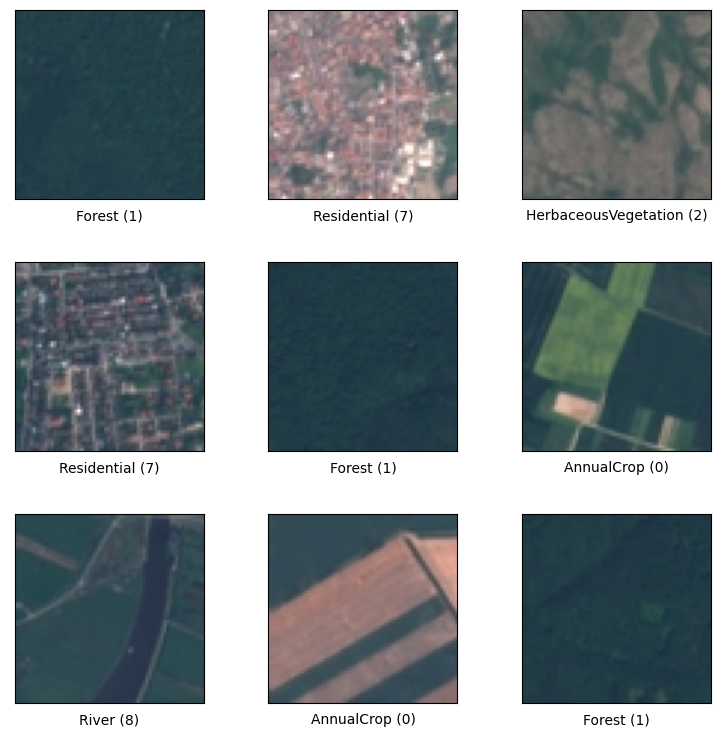

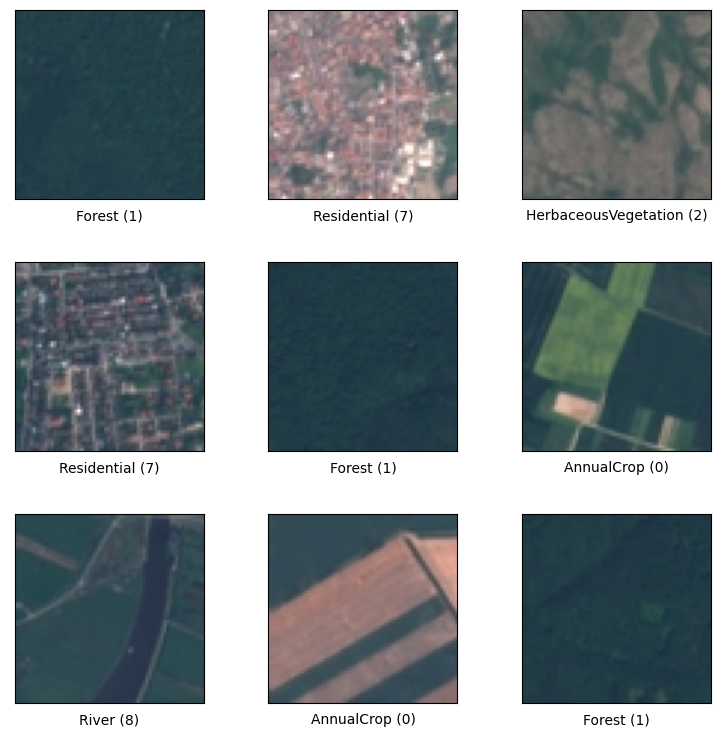

In [111]:
tfds.visualization.show_examples(ds, ds_info)

In [87]:
train_img = []
train_label= []
for img,label in tfds.as_numpy(ds):
    train_img.append(img)
    train_label.append(label)


In [88]:
train_img = np.array(train_img)
train_label = np.array(train_label)

View the shape

In [90]:
train_img.shape, train_label.shape

((27000, 64, 64, 3), (27000,))

In [92]:
train_img[0],train_label[0]

(array([[[35, 59, 71],
         [35, 59, 71],
         [36, 60, 72],
         ...,
         [32, 60, 72],
         [31, 59, 70],
         [33, 63, 73]],
 
        [[35, 59, 71],
         [34, 61, 72],
         [37, 61, 73],
         ...,
         [31, 59, 70],
         [31, 59, 70],
         [33, 63, 73]],
 
        [[37, 64, 73],
         [35, 64, 72],
         [38, 65, 74],
         ...,
         [35, 63, 74],
         [31, 59, 70],
         [32, 61, 69]],
 
        ...,
 
        [[31, 54, 70],
         [29, 55, 68],
         [32, 59, 70],
         ...,
         [33, 62, 70],
         [32, 60, 71],
         [34, 62, 73]],
 
        [[33, 59, 72],
         [32, 59, 70],
         [32, 59, 70],
         ...,
         [32, 60, 71],
         [37, 66, 74],
         [35, 65, 73]],
 
        [[34, 62, 73],
         [33, 61, 72],
         [35, 62, 73],
         ...,
         [36, 64, 75],
         [35, 65, 73],
         [30, 60, 68]]], dtype=uint8),
 1)

View the labels

In [130]:
train_img[0][:,:,1].shape

(64, 64)

In [133]:
print(train_img[0,:,:,1])

[[59 59 60 ... 60 59 63]
 [59 61 61 ... 59 59 63]
 [64 64 65 ... 63 59 61]
 ...
 [54 55 59 ... 62 60 62]
 [59 59 59 ... 60 66 65]
 [62 61 62 ... 64 65 60]]


In [94]:
label_class = set(train_label)
label_class

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

There are 10 classes

In [109]:
label_class =["Annual Crop 0", "Forest 1", "Vegetation 2", "Highway 3", "Indistrial 4", "Pasture 5", "PermanentCrop 6", "Residential 7", "River 8", "Sea lake 9"]

Plot images

Text(0.5, 1.0, 'PermanentCrop 6')

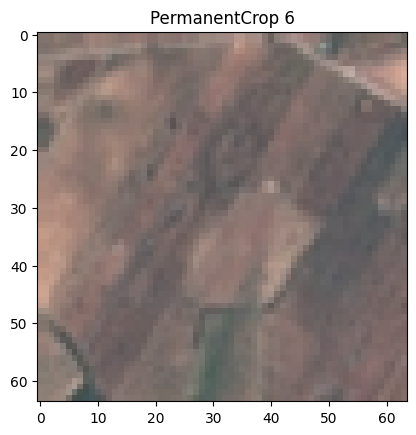

In [117]:
# check out sample labels
IDX_IMG= 15
plt.imshow(train_img[IDX_IMG])
plt.title( label_class[train_label[IDX_IMG]])

In [136]:
import random
print(random.randint(0,100))

63


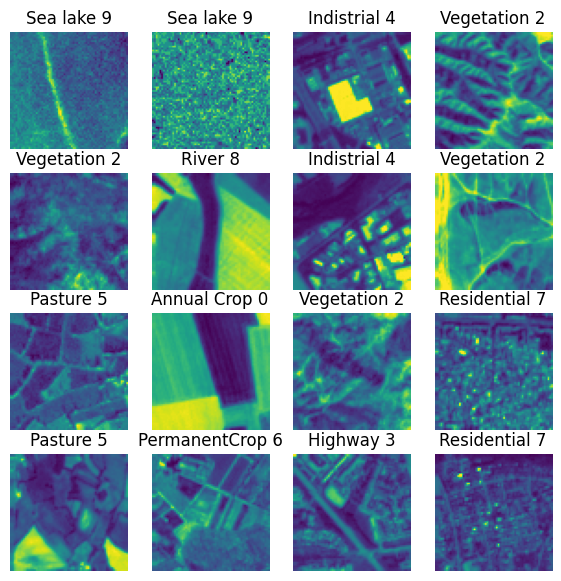

In [143]:
# plot samples in random
import random
DS_DIM = len(train_label)
plt.figure(figsize=(7,7))
for i in range(16):
    ax = plt.subplot(4,4,i+1)
    rand_ix = random.randint(0,DS_DIM)
    plt.imshow(train_img[rand_ix][:,:,0],) #cmap=plt.cm.binary_r)
    plt.title(label_class[train_label[rand_ix]])
    plt.axis(False)


## build a model : multiclass classification
The archietcture is this
<br>
<img src="images/Classification_multi.png" height=600>

**INPUT DATA PREPROCESSING**

In [152]:
#get a subset of all the images
train_img_A = train_img[:5000]
train_label_A = train_label[:5000]
test_img_A = train_img[5000:5500]
test_label_A = train_label[5000:5500]
print( train_img_A.shape,train_label_A.shape, test_img_A.shape, test_label_A.shape)

(5000, 64, 64, 3) (5000,) (500, 64, 64, 3) (500,)


In [164]:
#try a model
model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation= "relu"),
    tf.keras.layers.Dense(128, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.softmax), # i have 10 class
])

In [165]:
lr_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10 ** (epochs/20))

model_A.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics =["accurancy"]
)

In [166]:
history_A =  model_A.fit(train_img_A,
            train_label_A,
            epochs=20,
            callbacks=[lr_checker],
            verbose = 2
)

Epoch 1/20


ValueError: in user code:

    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\bruni\OneDrive\Desktop\Pyton\env_tf\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


**fix** the output  data
1. create one hot encoding for use CategoricalCrossentropy()
2. set SparseCategoricalCrossentropy() if are integers

In [169]:
#try a model
model_A = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
lr_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10 ** (epochs / 20))

model_A.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)


In [171]:
history_A =  model_A.fit(train_img_A,
            train_label_A,
            epochs=100,
            callbacks=[lr_checker],
            verbose = 2
)

Epoch 1/100
157/157 - 3s - loss: 24.7728 - accuracy: 0.2020 - lr: 1.0000e-08 - 3s/epoch - 22ms/step
Epoch 2/100
157/157 - 2s - loss: 24.6348 - accuracy: 0.1994 - lr: 1.1220e-08 - 2s/epoch - 15ms/step
Epoch 3/100
157/157 - 2s - loss: 24.4879 - accuracy: 0.2024 - lr: 1.2589e-08 - 2s/epoch - 15ms/step
Epoch 4/100
157/157 - 2s - loss: 24.3324 - accuracy: 0.2040 - lr: 1.4125e-08 - 2s/epoch - 15ms/step
Epoch 5/100
157/157 - 2s - loss: 24.1638 - accuracy: 0.2044 - lr: 1.5849e-08 - 2s/epoch - 15ms/step
Epoch 6/100
157/157 - 2s - loss: 23.9830 - accuracy: 0.2068 - lr: 1.7783e-08 - 2s/epoch - 15ms/step
Epoch 7/100
157/157 - 2s - loss: 23.7830 - accuracy: 0.2086 - lr: 1.9953e-08 - 2s/epoch - 16ms/step
Epoch 8/100
157/157 - 3s - loss: 23.5710 - accuracy: 0.2092 - lr: 2.2387e-08 - 3s/epoch - 17ms/step
Epoch 9/100
157/157 - 3s - loss: 23.3477 - accuracy: 0.2092 - lr: 2.5119e-08 - 3s/epoch - 16ms/step
Epoch 10/100
157/157 - 3s - loss: 23.1241 - accuracy: 0.2112 - lr: 2.8184e-08 - 3s/epoch - 18ms/step

<AxesSubplot: >

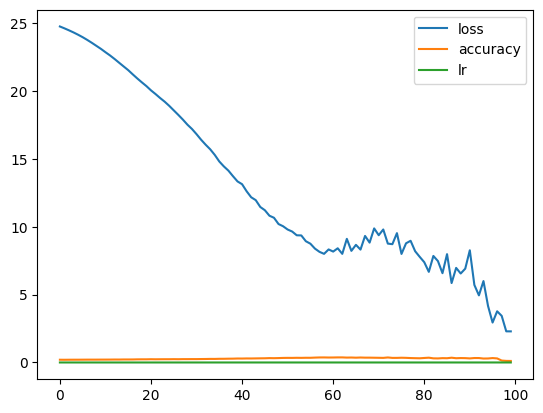

In [178]:
import pandas as pd
# fine the learning curve
pd.DataFrame( history_A.history).plot()


Text(0.5, 1.0, 'accuracy')

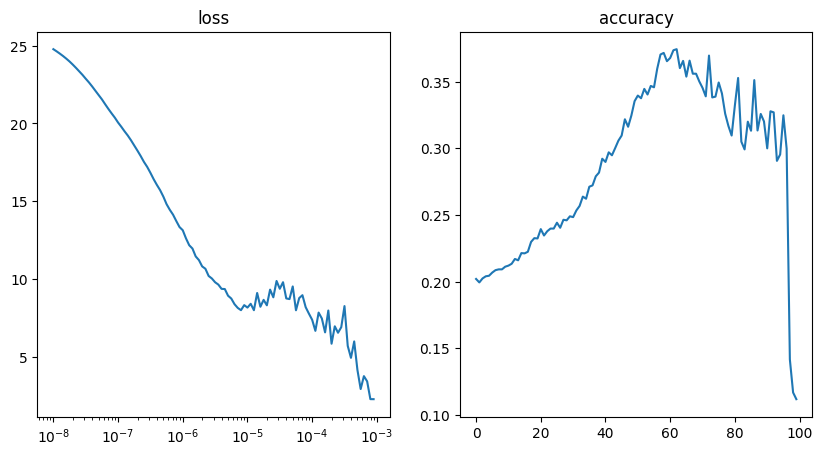

In [192]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.semilogx([1e-8 * 10 ** (e / 20) for e in range(100)], history_A.history["loss"])
plt.title("loss")
plt.subplot(1,2,2)
plt.plot(history_A.history["accuracy"])
plt.title("accuracy")

We are far away from something working
**fix** : SCALE




In [193]:
#get a subset of all the images
scale_max = np.max(train_img_A)
print(scale_max)

255


In [198]:
train_img_N = train_img[:5000]/scale_max
train_label_N = train_label[:5000]
test_img_N = train_img[5000:5500]/scale_max
test_label_N = train_label[5000:5500]
print( train_img_N.shape,train_label_N.shape, test_img_N.shape, test_label_N.shape)

(5000, 64, 64, 3) (5000,) (500, 64, 64, 3) (500,)


In [199]:
print(train_img_N[0])

[[[0.1372549  0.23137255 0.27843137]
  [0.1372549  0.23137255 0.27843137]
  [0.14117647 0.23529412 0.28235294]
  ...
  [0.1254902  0.23529412 0.28235294]
  [0.12156863 0.23137255 0.2745098 ]
  [0.12941176 0.24705882 0.28627451]]

 [[0.1372549  0.23137255 0.27843137]
  [0.13333333 0.23921569 0.28235294]
  [0.14509804 0.23921569 0.28627451]
  ...
  [0.12156863 0.23137255 0.2745098 ]
  [0.12156863 0.23137255 0.2745098 ]
  [0.12941176 0.24705882 0.28627451]]

 [[0.14509804 0.25098039 0.28627451]
  [0.1372549  0.25098039 0.28235294]
  [0.14901961 0.25490196 0.29019608]
  ...
  [0.1372549  0.24705882 0.29019608]
  [0.12156863 0.23137255 0.2745098 ]
  [0.1254902  0.23921569 0.27058824]]

 ...

 [[0.12156863 0.21176471 0.2745098 ]
  [0.11372549 0.21568627 0.26666667]
  [0.1254902  0.23137255 0.2745098 ]
  ...
  [0.12941176 0.24313725 0.2745098 ]
  [0.1254902  0.23529412 0.27843137]
  [0.13333333 0.24313725 0.28627451]]

 [[0.12941176 0.23137255 0.28235294]
  [0.1254902  0.23137255 0.2745098 ]


In [197]:
#try a model
model_B = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
#lr_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10 ** (epochs / 20))

model_B.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [201]:
history_B =  model_B.fit(train_img_N, train_label_N,epochs=20,verbose = 2)

Epoch 1/20
157/157 - 3s - loss: 2.2581 - accuracy: 0.2328 - 3s/epoch - 18ms/step
Epoch 2/20
157/157 - 2s - loss: 1.7937 - accuracy: 0.3232 - 2s/epoch - 14ms/step
Epoch 3/20
157/157 - 2s - loss: 1.7252 - accuracy: 0.3576 - 2s/epoch - 14ms/step
Epoch 4/20
157/157 - 2s - loss: 1.6853 - accuracy: 0.3636 - 2s/epoch - 15ms/step
Epoch 5/20
157/157 - 2s - loss: 1.6464 - accuracy: 0.3764 - 2s/epoch - 14ms/step
Epoch 6/20
157/157 - 2s - loss: 1.5934 - accuracy: 0.4002 - 2s/epoch - 14ms/step
Epoch 7/20
157/157 - 2s - loss: 1.5901 - accuracy: 0.3936 - 2s/epoch - 14ms/step
Epoch 8/20
157/157 - 2s - loss: 1.5518 - accuracy: 0.4150 - 2s/epoch - 14ms/step
Epoch 9/20
157/157 - 2s - loss: 1.5385 - accuracy: 0.4212 - 2s/epoch - 14ms/step
Epoch 10/20
157/157 - 2s - loss: 1.5263 - accuracy: 0.4348 - 2s/epoch - 14ms/step
Epoch 11/20
157/157 - 2s - loss: 1.4933 - accuracy: 0.4418 - 2s/epoch - 14ms/step
Epoch 12/20
157/157 - 2s - loss: 1.4743 - accuracy: 0.4426 - 2s/epoch - 15ms/step
Epoch 13/20
157/157 - 3s 

It is better
Lets' see if is the same with less neurons

In [203]:
#try a model
model_B_minus = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
#lr_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10 ** (epochs / 20))

model_B_minus.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [204]:
history_B_minus =  model_B_minus.fit(train_img_N, train_label_N,epochs=20,verbose = 2)

Epoch 1/20
157/157 - 2s - loss: 2.1466 - accuracy: 0.2132 - 2s/epoch - 10ms/step
Epoch 2/20
157/157 - 1s - loss: 1.7904 - accuracy: 0.3146 - 1s/epoch - 7ms/step
Epoch 3/20
157/157 - 1s - loss: 1.6736 - accuracy: 0.3696 - 1s/epoch - 7ms/step
Epoch 4/20
157/157 - 1s - loss: 1.6315 - accuracy: 0.3864 - 966ms/epoch - 6ms/step
Epoch 5/20
157/157 - 1s - loss: 1.5980 - accuracy: 0.3926 - 947ms/epoch - 6ms/step
Epoch 6/20
157/157 - 1s - loss: 1.5826 - accuracy: 0.4000 - 938ms/epoch - 6ms/step
Epoch 7/20
157/157 - 1s - loss: 1.5298 - accuracy: 0.4220 - 1s/epoch - 8ms/step
Epoch 8/20
157/157 - 1s - loss: 1.5090 - accuracy: 0.4354 - 941ms/epoch - 6ms/step
Epoch 9/20
157/157 - 1s - loss: 1.4926 - accuracy: 0.4460 - 999ms/epoch - 6ms/step
Epoch 10/20
157/157 - 1s - loss: 1.4827 - accuracy: 0.4470 - 1s/epoch - 7ms/step
Epoch 11/20
157/157 - 1s - loss: 1.4735 - accuracy: 0.4488 - 985ms/epoch - 6ms/step
Epoch 12/20
157/157 - 2s - loss: 1.4455 - accuracy: 0.4668 - 2s/epoch - 10ms/step
Epoch 13/20
157/1

<AxesSubplot: >

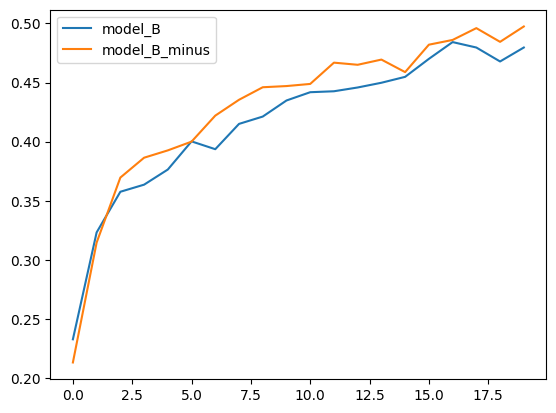

In [209]:
pd.DataFrame({ "model_B" :history_B.history["accuracy"], "model_B_minus": history_B_minus.history["accuracy"]}).plot()

Well the model with **less NN perform better** by now
SO let's see if we can tweek the laerning rate

In [210]:
#try a model
model_C_lr = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
lr_C_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-6 * 10 ** (epochs / 20))

model_C_lr.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [212]:
history_C_lr =  model_C_lr.fit(train_img_N, train_label_N,epochs=150,verbose = 2, callbacks = [lr_C_checker])

Epoch 1/150
157/157 - 1s - loss: 1.6371 - accuracy: 0.3696 - lr: 1.0000e-06 - 1s/epoch - 7ms/step
Epoch 2/150
157/157 - 1s - loss: 1.6275 - accuracy: 0.3690 - lr: 1.1220e-06 - 808ms/epoch - 5ms/step
Epoch 3/150
157/157 - 1s - loss: 1.6223 - accuracy: 0.3692 - lr: 1.2589e-06 - 795ms/epoch - 5ms/step
Epoch 4/150
157/157 - 1s - loss: 1.6193 - accuracy: 0.3706 - lr: 1.4125e-06 - 815ms/epoch - 5ms/step
Epoch 5/150
157/157 - 1s - loss: 1.6170 - accuracy: 0.3712 - lr: 1.5849e-06 - 857ms/epoch - 5ms/step
Epoch 6/150
157/157 - 1s - loss: 1.6150 - accuracy: 0.3732 - lr: 1.7783e-06 - 810ms/epoch - 5ms/step
Epoch 7/150
157/157 - 1s - loss: 1.6132 - accuracy: 0.3742 - lr: 1.9953e-06 - 895ms/epoch - 6ms/step
Epoch 8/150
157/157 - 1s - loss: 1.6115 - accuracy: 0.3744 - lr: 2.2387e-06 - 816ms/epoch - 5ms/step
Epoch 9/150
157/157 - 1s - loss: 1.6102 - accuracy: 0.3754 - lr: 2.5119e-06 - 805ms/epoch - 5ms/step
Epoch 10/150
157/157 - 1s - loss: 1.6089 - accuracy: 0.3750 - lr: 2.8184e-06 - 869ms/epoch - 6

Text(0.5, 1.0, 'accuracy')

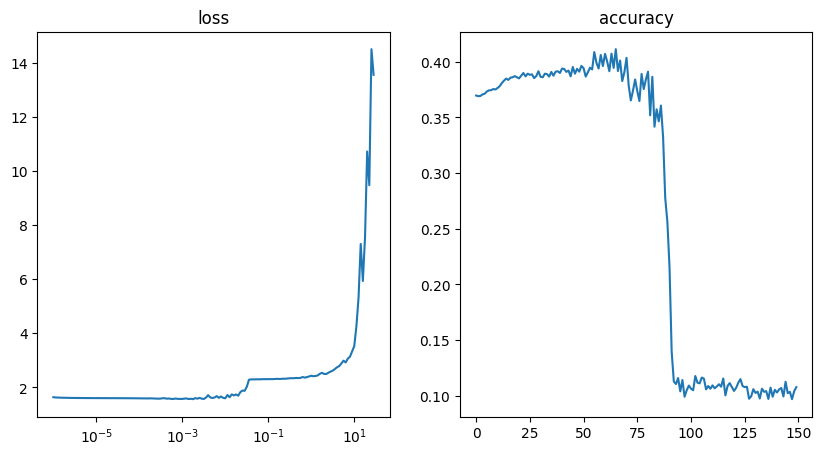

In [215]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.semilogx([1e-6 * 10 ** (e / 20) for e in range(150)], history_C_lr.history["loss"])
plt.title("loss")
plt.subplot(1,2,2)
plt.plot(history_C_lr.history["accuracy"])
plt.title("accuracy")

Nothing found, default leraning rate Adam is good
Try to increase **NN hidden layers**

In [216]:
#try a model
model_D = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
#lr_C_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-6 * 10 ** (epochs / 20))

model_D.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [217]:
history_D =  model_D.fit(train_img_N, train_label_N,epochs=100,verbose = 2, validation_data=(test_img_N,test_label_N))

Epoch 1/100
157/157 - 2s - loss: 2.0095 - accuracy: 0.2364 - val_loss: 1.8523 - val_accuracy: 0.2600 - 2s/epoch - 12ms/step
Epoch 2/100
157/157 - 1s - loss: 1.7226 - accuracy: 0.3370 - val_loss: 1.8112 - val_accuracy: 0.3160 - 900ms/epoch - 6ms/step
Epoch 3/100
157/157 - 1s - loss: 1.6276 - accuracy: 0.3914 - val_loss: 1.7463 - val_accuracy: 0.3420 - 908ms/epoch - 6ms/step
Epoch 4/100
157/157 - 1s - loss: 1.5873 - accuracy: 0.3992 - val_loss: 1.6198 - val_accuracy: 0.4000 - 910ms/epoch - 6ms/step
Epoch 5/100
157/157 - 1s - loss: 1.5570 - accuracy: 0.4136 - val_loss: 1.5510 - val_accuracy: 0.4440 - 976ms/epoch - 6ms/step
Epoch 6/100
157/157 - 1s - loss: 1.4821 - accuracy: 0.4468 - val_loss: 1.5138 - val_accuracy: 0.4080 - 922ms/epoch - 6ms/step
Epoch 7/100
157/157 - 1s - loss: 1.5113 - accuracy: 0.4422 - val_loss: 1.5008 - val_accuracy: 0.4520 - 914ms/epoch - 6ms/step
Epoch 8/100
157/157 - 1s - loss: 1.4405 - accuracy: 0.4650 - val_loss: 1.5821 - val_accuracy: 0.4300 - 973ms/epoch - 6ms

<AxesSubplot: >

<Figure size 1000x500 with 0 Axes>

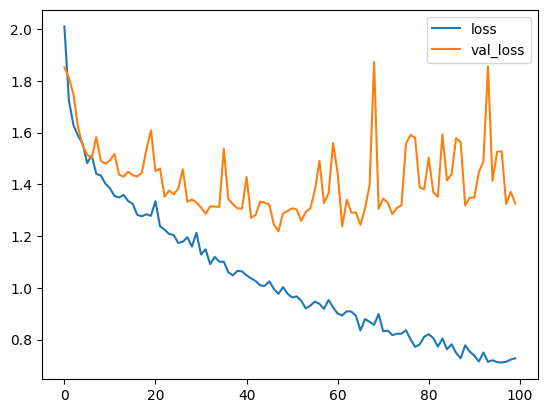

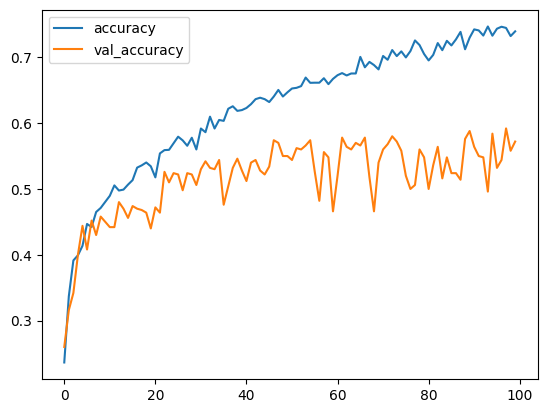

In [228]:
plt.figure(figsize=(10,5))
hist_plt= pd.DataFrame(history_D.history)
hist_plt[["loss","val_loss"]].plot()
hist_plt[["accuracy","val_accuracy"]].plot()

Validation is not doing so well

Well lets' try with ***downshape** , i.e. one dimensional array, not RGB


In [238]:
#start from scaled ones and down shape

train_img_O = train_img_N[:,:,:,0]
train_label_O = train_label_N
test_img_O = train_img_N[:,:,:,0]
test_label_O = train_label_N
print( train_img_O.shape,train_label_O.shape, test_img_O.shape, test_label_O.shape)

(5000, 64, 64) (5000,) (5000, 64, 64) (5000,)


In [253]:
print(train_img_O[0])

[[0.1372549  0.1372549  0.14117647 ... 0.1254902  0.12156863 0.12941176]
 [0.1372549  0.13333333 0.14509804 ... 0.12156863 0.12156863 0.12941176]
 [0.14509804 0.1372549  0.14901961 ... 0.1372549  0.12156863 0.1254902 ]
 ...
 [0.12156863 0.11372549 0.1254902  ... 0.12941176 0.1254902  0.13333333]
 [0.12941176 0.1254902  0.1254902  ... 0.1254902  0.14509804 0.1372549 ]
 [0.13333333 0.12941176 0.1372549  ... 0.14117647 0.1372549  0.11764706]]


In [251]:
#try a model
model_O = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),  # i have 10 class
])
#lr_C_checker = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-6 * 10 ** (epochs / 20))

model_O.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [252]:
history_O = model_O.fit(
    train_img_O,
    train_label_O,
    epochs=400,
    verbose=2,
    validation_data=(test_img_O, test_label_O),
    batch_size=128)

Epoch 1/400
40/40 - 1s - loss: 2.2489 - accuracy: 0.1146 - val_loss: 2.2099 - val_accuracy: 0.1244 - 968ms/epoch - 24ms/step
Epoch 2/400
40/40 - 0s - loss: 2.1879 - accuracy: 0.1376 - val_loss: 2.1606 - val_accuracy: 0.1472 - 353ms/epoch - 9ms/step
Epoch 3/400
40/40 - 0s - loss: 2.1524 - accuracy: 0.1748 - val_loss: 2.1262 - val_accuracy: 0.1744 - 343ms/epoch - 9ms/step
Epoch 4/400
40/40 - 0s - loss: 2.0995 - accuracy: 0.2162 - val_loss: 2.0660 - val_accuracy: 0.3020 - 315ms/epoch - 8ms/step
Epoch 5/400
40/40 - 0s - loss: 2.0580 - accuracy: 0.2570 - val_loss: 2.0234 - val_accuracy: 0.3028 - 342ms/epoch - 9ms/step
Epoch 6/400
40/40 - 0s - loss: 2.0140 - accuracy: 0.2820 - val_loss: 1.9860 - val_accuracy: 0.2940 - 303ms/epoch - 8ms/step
Epoch 7/400
40/40 - 0s - loss: 1.9609 - accuracy: 0.3078 - val_loss: 1.9739 - val_accuracy: 0.3052 - 309ms/epoch - 8ms/step
Epoch 8/400
40/40 - 0s - loss: 1.9342 - accuracy: 0.2936 - val_loss: 1.8866 - val_accuracy: 0.3264 - 310ms/epoch - 8ms/step
Epoch 9

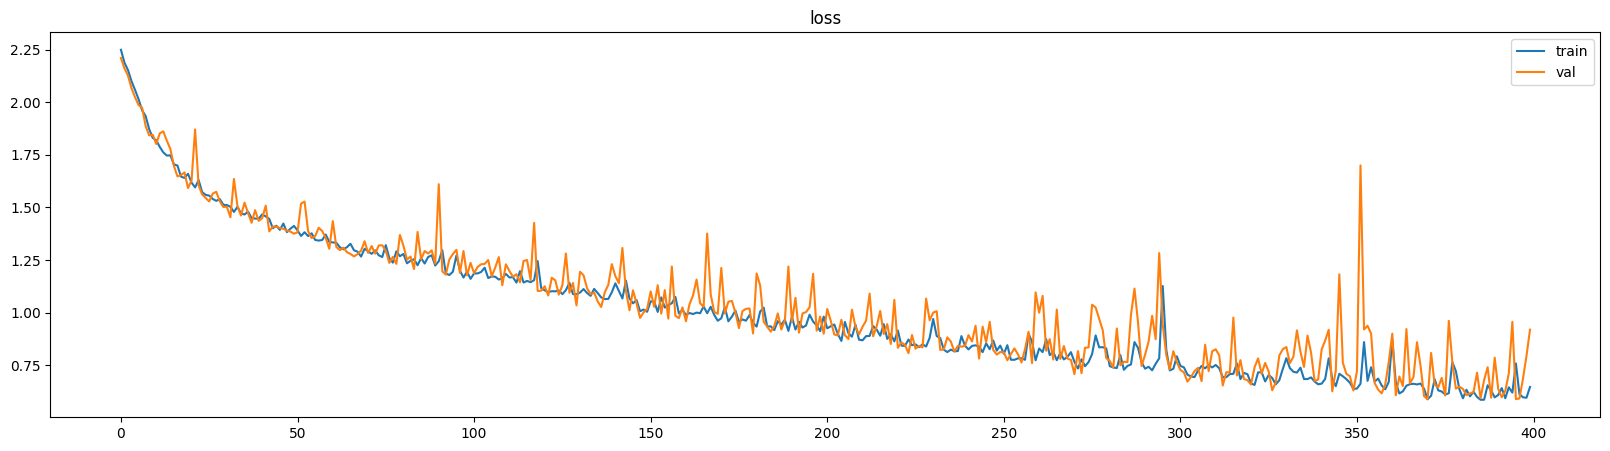

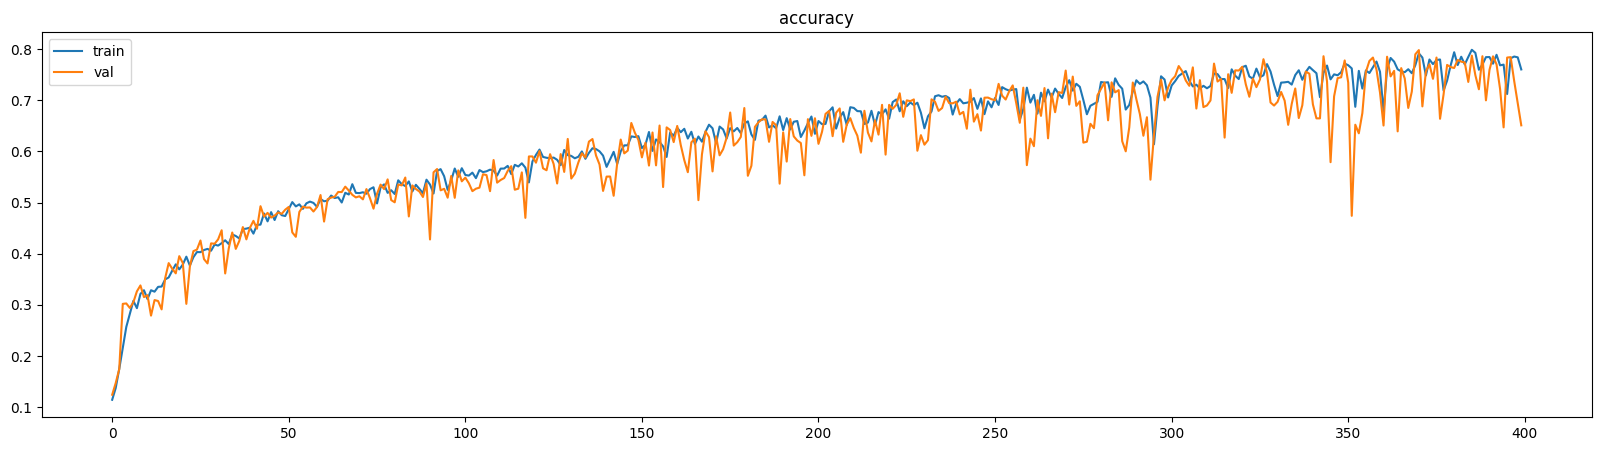

In [267]:
hist_plt_O= pd.DataFrame(history_O.history)
plt.style.use('default')
plt.figure(figsize=(20,5))
plt.plot(hist_plt_O[["loss","val_loss"]])
plt.legend(["train","val"])
plt.title("loss")
plt.show()
plt.figure(figsize=(20,5))
plt.plot(hist_plt_O[["accuracy","val_accuracy"]])
plt.legend(["train","val"])
plt.title("accuracy")
plt.show()


# Evaluating the model

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

In [268]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


Since a confusion matrix compares the truth labels (test_labels) to the predicted labels, we have to make some predictions with our model.

In [269]:
y_predictions = model_O.predict(train_img_O)

157/157 [==============================] - 0s 2ms/step


In [271]:
print(train_label_O[:5])

[1 7 2 7 1]


In [278]:
y_predictions_compact = np.argmax(tf.round(y_predictions), axis=1)
y_predictions_compact[:5]

array([1, 7, 2, 0, 1], dtype=int64)

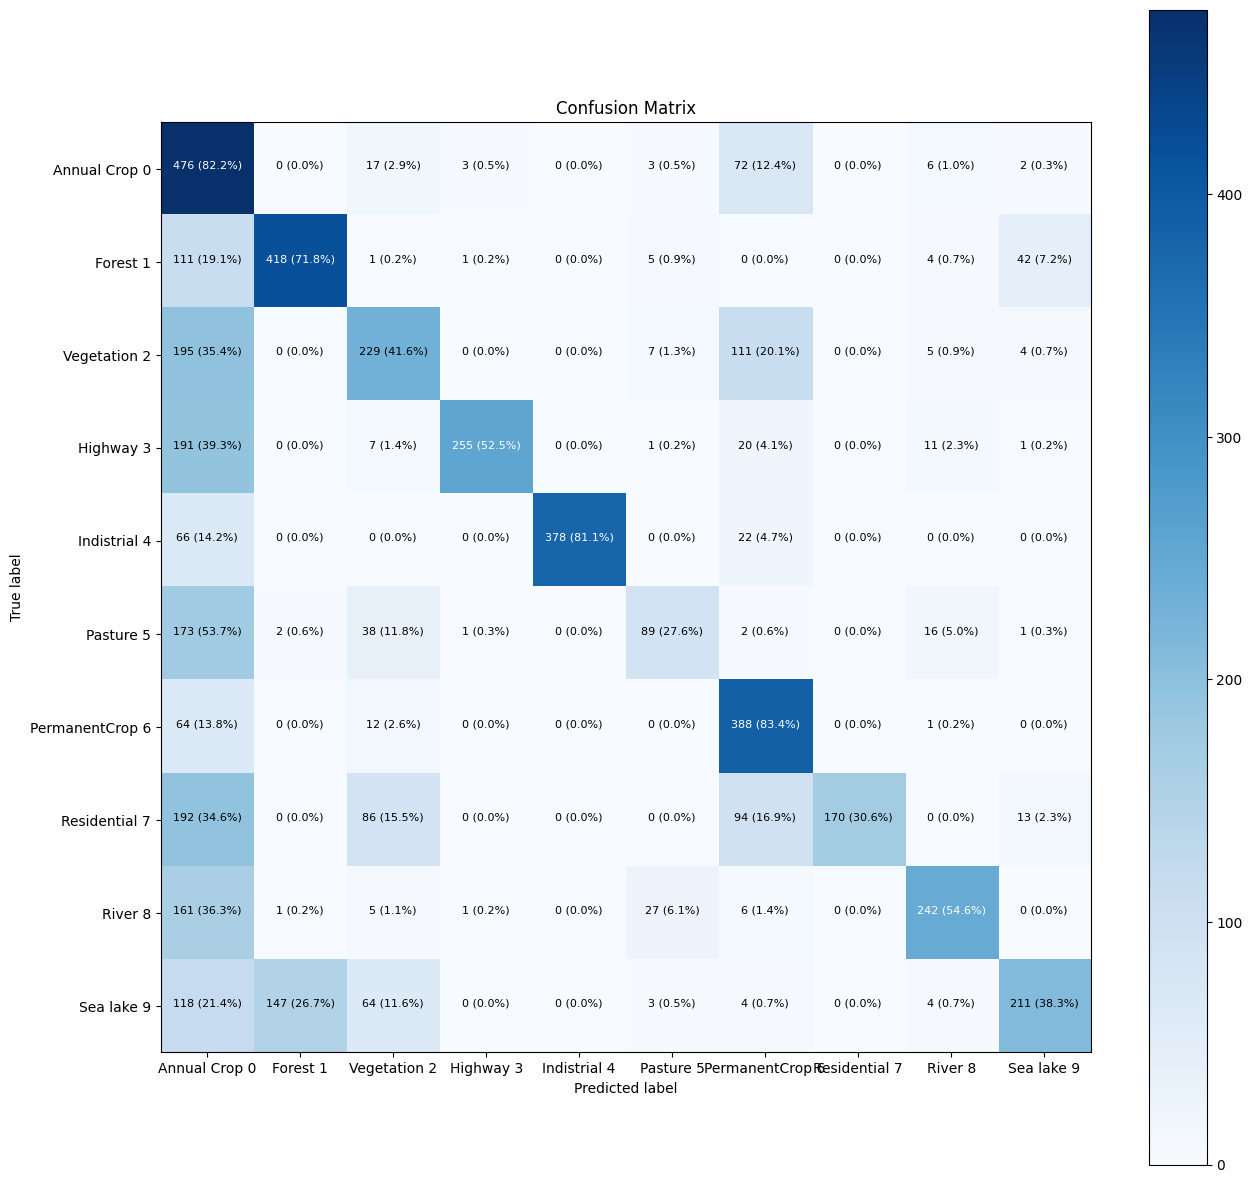

In [280]:
make_confusion_matrix(train_label_O,y_predictions_compact,classes=label_class, figsize=(15,15), text_size=8)

In [287]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 64, 64)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  #plt.imshow(target_image, cmap=plt.cm.binary)
  plt.imshow(target_image)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 19ms/step


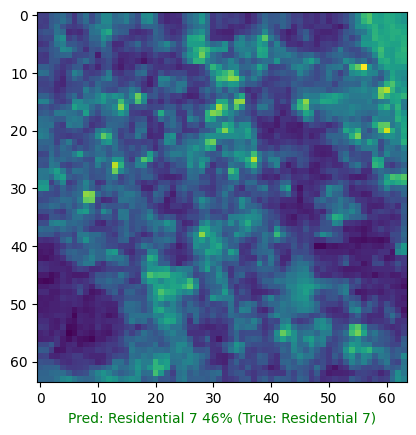

In [288]:
# Check out a random image as well as its prediction
plot_random_image(model=model_O,
                  images=test_img_O,
                  true_labels=test_label_O,
                  classes=label_class)